In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

!pip install imutils


In [ ]:
# Specify your dataset directory
dataset = "/content/sample_data/dataset"


In [ ]:
# Load image paths
iPaths = list(paths.list_images(dataset))
data = []
labels = []


In [ ]:
# Load and preprocess images
for iPath in iPaths:
    label = iPath.split(os.path.sep)[-2]
    image = cv2.imread(iPath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    data.append(image)
    labels.append(label)


In [ ]:
data = np.array(data) / 255.0
labels = np.array(labels)


In [ ]:
# Binarize labels and split the data
LB = LabelBinarizer()
labels = LB.fit_transform(labels)
labels = to_categorical(labels)
(X_train, X_test, Y_train, Y_test) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)


In [ ]:
# Set up data augmentation
trainAug = ImageDataGenerator(rotation_range=15, fill_mode="nearest")


In [ ]:
# Define the model architecture
base_model = InceptionV3(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))
model = base_model.output
model = AveragePooling2D(pool_size=(4, 4))(model)
model = Flatten(name="flatten")(model)
model = Dense(64, activation="relu")(model)
model = Dropout(0.5)(model)
model = Dense(2, activation="softmax")(model)


87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
full_model = Model(inputs=base_model.input, outputs=model)
for layer in full_model.layers:
    layer.trainable = False


In [ ]:
# Compile the model
INIT_LR = 1e-3
EPOCHS = 30
BS = 8
opt = Adam(learning_rate=INIT_LR)
full_model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])


In [ ]:
# Train the model
R = full_model.fit_generator(
    trainAug.flow(X_train, Y_train, batch_size=BS),
    steps_per_epoch=len(X_train) // BS,
    validation_data=(X_test, Y_test),
    validation_steps=len(X_test) // BS,
    epochs=EPOCHS
)


<ipython-input-11-19cdf6b3d68f>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  R = full_model.fit_generator(


Epoch 1/30
9/9 [==============================] - 23s 2s/step - loss: 0.6323 - accuracy: 0.7015 - val_loss: 0.5369 - val_accuracy: 0.7368
Epoch 2/30
9/9 [==============================] - 9s 981ms/step - loss: 0.5578 - accuracy: 0.7463 - val_loss: 0.5369 - val_accuracy: 0.7368
Epoch 3/30
9/9 [==============================] - 11s 1s/step - loss: 0.6226 - accuracy: 0.6866 - val_loss: 0.5369 - val_accuracy: 0.7368
Epoch 4/30
9/9 [==============================] - 11s 1s/step - loss: 0.6332 - accuracy: 0.7313 - val_loss: 0.5369 - val_accuracy: 0.7368
Epoch 5/30
9/9 [==============================] - 12s 1s/step - loss: 0.6313 - accuracy: 0.7015 - val_loss: 0.5369 - val_accuracy: 0.7368
Epoch 6/30
9/9 [==============================] - 11s 1s/step - loss: 0.5975 - accuracy: 0.7164 - val_loss: 0.5369 - val_accuracy: 0.7368
Epoch 7/30
9/9 [==============================] - 10s 1s/step - loss: 0.5863 - accuracy: 0.7463 - val_loss: 0.5369 - val_accuracy: 0.7368
Epoch 8/30
9/9 [================

Compiling Starts


<ipython-input-19-3e5e7511e160>:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  R = full_model.fit_generator(


Epoch 1/30
9/9 [==============================] - 13s 1s/step - loss: 1.1230 - accuracy: 0.2836 - val_loss: 0.9159 - val_accuracy: 0.2632
Epoch 2/30
9/9 [==============================] - 7s 728ms/step - loss: 0.9590 - accuracy: 0.3433 - val_loss: 0.9159 - val_accuracy: 0.2632
Epoch 3/30
9/9 [==============================] - 8s 880ms/step - loss: 1.0623 - accuracy: 0.2687 - val_loss: 0.9159 - val_accuracy: 0.2632
Epoch 4/30
9/9 [==============================] - 9s 1s/step - loss: 1.0240 - accuracy: 0.3284 - val_loss: 0.9159 - val_accuracy: 0.2632
Epoch 5/30
9/9 [==============================] - 8s 939ms/step - loss: 1.0489 - accuracy: 0.3582 - val_loss: 0.9159 - val_accuracy: 0.2632
Epoch 6/30
9/9 [==============================] - 9s 980ms/step - loss: 1.0096 - accuracy: 0.3134 - val_loss: 0.9159 - val_accuracy: 0.2632
Epoch 7/30
9/9 [==============================] - 7s 827ms/step - loss: 1.0930 - accuracy: 0.3433 - val_loss: 0.9159 - val_accuracy: 0.2632
Epoch 8/30
9/9 [=========

3/3 [==============================] - 2s 399ms/step


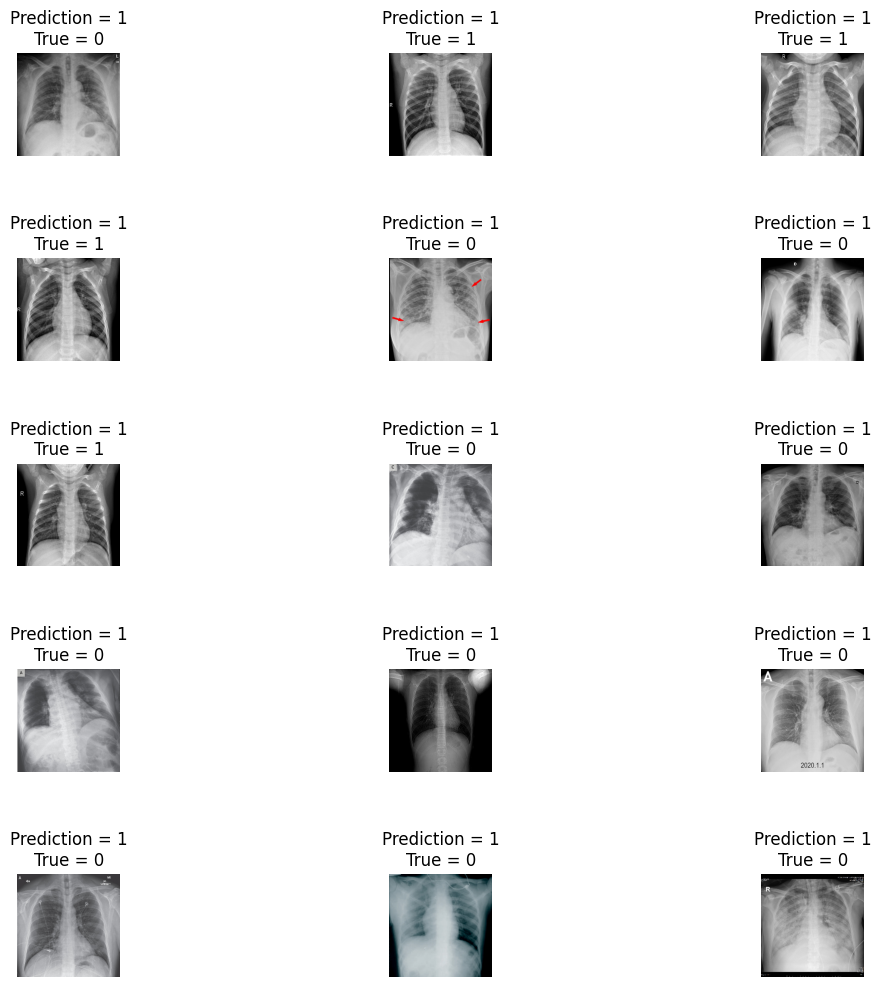

In [ ]:
L = 5
W = 3
fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()
y_pred = full_model.predict(X_test, batch_size=BS)
for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\nTrue = {}'.format(y_pred.argmax(axis=1)[i],
                                                          Y_test.argmax(axis=1)[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1, hspace=1)


In [ ]:
from sklearn.metrics import classification_report
y_pred = full_model.predict(X_test, batch_size=BS)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(Y_test.argmax(axis=1), y_pred, target_names=LB.classes_))

from sklearn.metrics import accuracy_score
accuracy_score(Y_test.argmax(axis=1), y_pred)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test.argmax(axis=1), y_pred)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)


3/3 [==============================] - 2s 632ms/step
              precision    recall  f1-score   support

       covid       0.00      0.00      0.00        14
      normal       0.26      1.00      0.42         5

    accuracy                           0.26        19
   macro avg       0.13      0.50      0.21        19
weighted avg       0.07      0.26      0.11        19

[[ 0 14]
 [ 0  5]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))


acc: 0.2632
sensitivity: 0.0000
specificity: 1.0000


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test.argmax(axis=1), y_pred)


0.2631578947368421

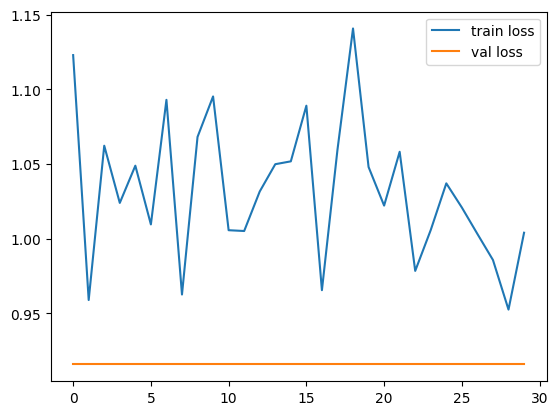

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(R.history['loss'], label='train loss')
plt.plot(R.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


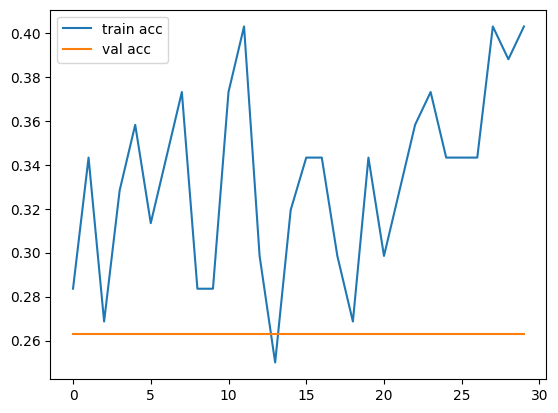

In [ ]:
# plot the accuracy
plt.plot(R.history['accuracy'], label='train acc')
plt.plot(R.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()


In [ ]:
model.save('Covid_model.h5')

AttributeError: ignored